In [22]:
## All needed libraries and variables
from google.cloud import bigquery
import pandas as pd
import matplotlib.pyplot as plt
from google.oauth2 import service_account

credentials = service_account.Credentials.from_service_account_file("../data-analytic-project-405114-28756d0e3361.json")
client = bigquery.Client(credentials=credentials)
table_id = "data-analytic-project-405114.G4_daily_user_20210131.example_table"
project_id = "data-analytic-project-405114"


<BarContainer object of 5 artists>

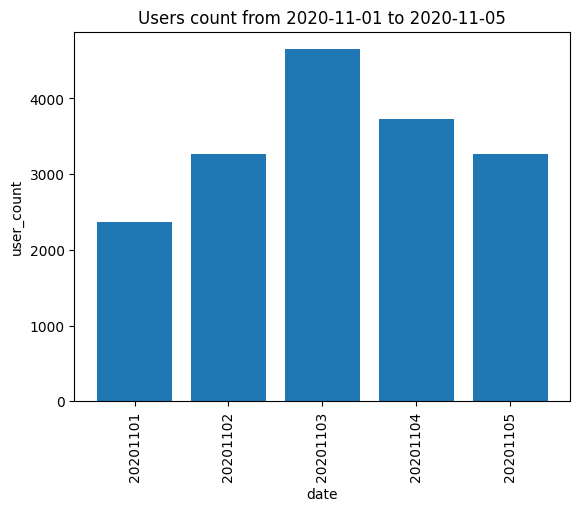

In [27]:
sql = """
SELECT
  _TABLE_SUFFIX AS date,
  COUNT(DISTINCT user_pseudo_id) AS user_count
FROM
  `data-analytic-project-405114.G4_daily_user.G4_daily_user_*`
WHERE
  _TABLE_SUFFIX BETWEEN '20201101' AND '20201105'
GROUP BY
  date
ORDER BY
  date ASC
"""

df_raw = pd.read_gbq(sql, 
project_id,credentials=credentials)
plt.xticks(rotation='vertical')
plt.xlabel("date")
plt.ylabel("user_count")
plt.title("Users count from 2020-11-01 to 2020-11-05")
plt.bar(df_raw["date"], df_raw["user_count"])



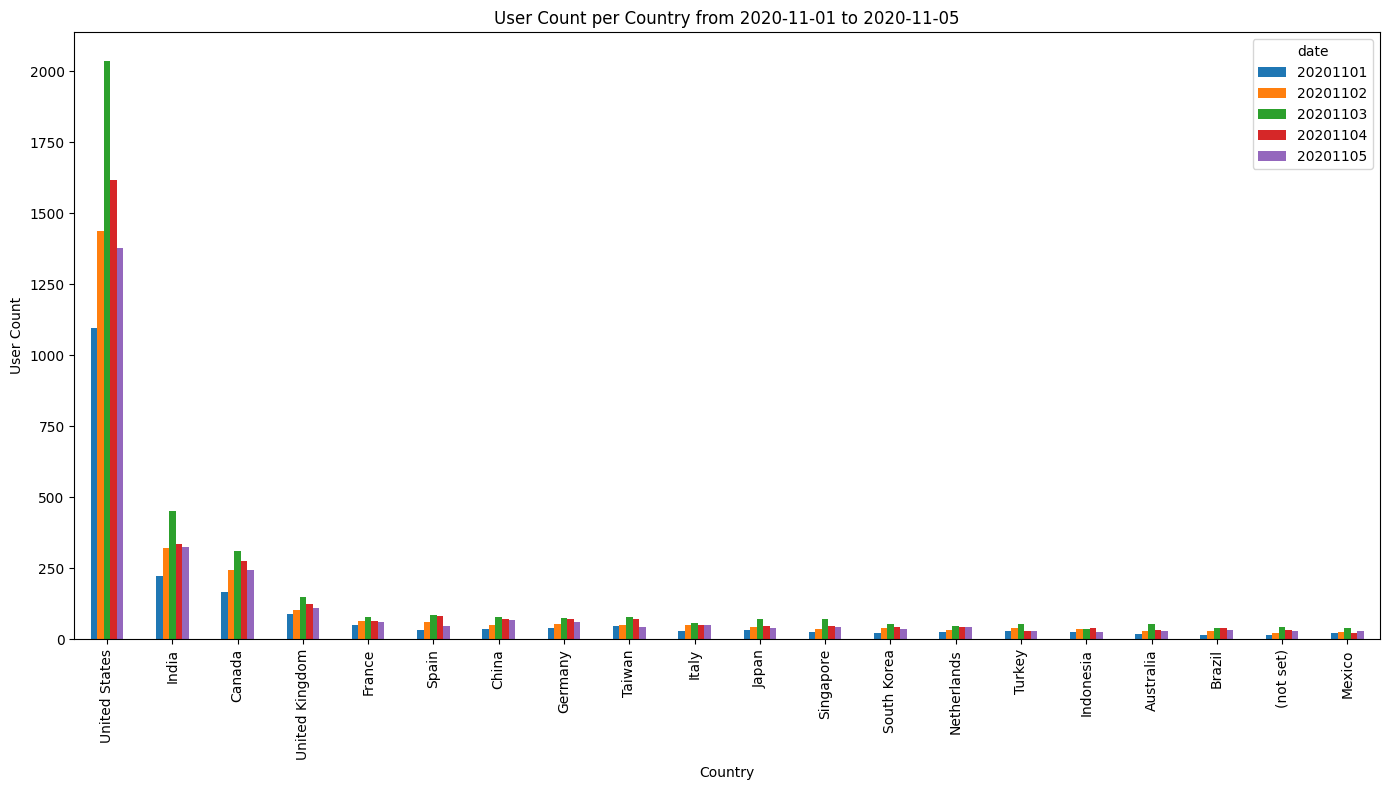

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
from google.oauth2 import service_account

sql = """
SELECT
  _TABLE_SUFFIX AS date,
  country,
  COUNT(DISTINCT user_pseudo_id) AS user_count
FROM
  `data-analytic-project-405114.G4_daily_user.G4_daily_user_*`
WHERE
  _TABLE_SUFFIX BETWEEN '20201101' AND '20201105'
GROUP BY
  date,
  country
ORDER BY
  date,
  user_count DESC
"""
df_raw = pd.read_gbq(sql, 
project_id,credentials=credentials)
df_pivot = df_raw.pivot_table(index='country', columns='date', values='user_count')

# Select the top 20 countries by total user count across all dates
top_countries = df_pivot.sum(axis=1).nlargest(20).index
df_top_countries = df_pivot.loc[top_countries]

# Plotting
fig, ax = plt.subplots(figsize=(14, 8))
df_top_countries.plot(kind='bar', ax=ax) 
ax.set_xlabel('Country')
ax.set_ylabel('User Count')
ax.set_title('User Count per Country from 2020-11-01 to 2020-11-05')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()



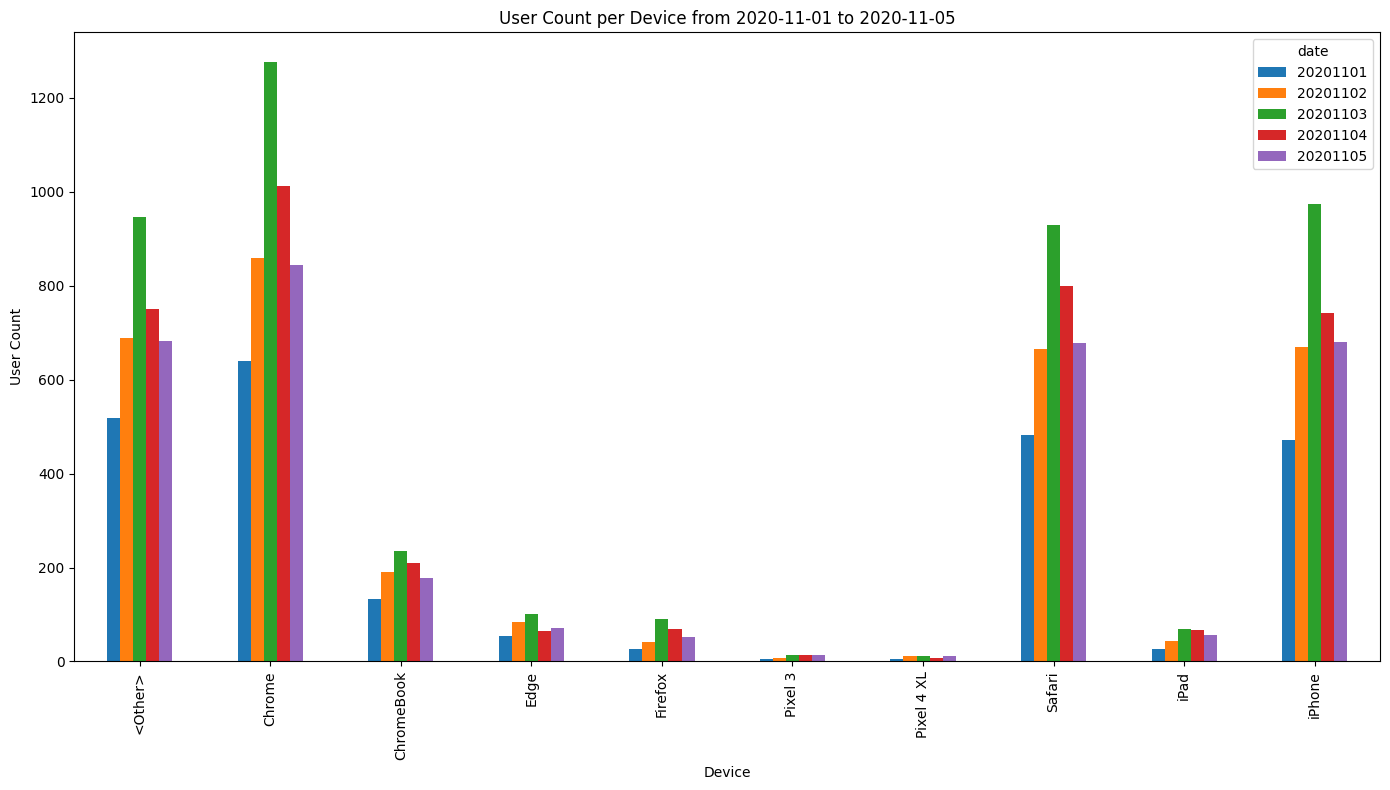

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
from google.oauth2 import service_account

sql = """
SELECT
  _TABLE_SUFFIX AS date,
  device,
  COUNT(DISTINCT user_pseudo_id) AS user_count
FROM
  `data-analytic-project-405114.G4_daily_user.G4_daily_user_*`
WHERE
  _TABLE_SUFFIX BETWEEN '20201101' AND '20201105'
GROUP BY
  date,
  device
"""
df_raw = pd.read_gbq(sql, 
project_id,credentials=credentials)
df_pivot = df_raw.pivot_table(index='device', columns='date', values='user_count')
# Plotting
fig, ax = plt.subplots(figsize=(14, 8))
df_pivot.plot(kind='bar', ax=ax) 
ax.set_xlabel('Device')
ax.set_ylabel('User Count')
ax.set_title('User Count per Device from 2020-11-01 to 2020-11-05')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()



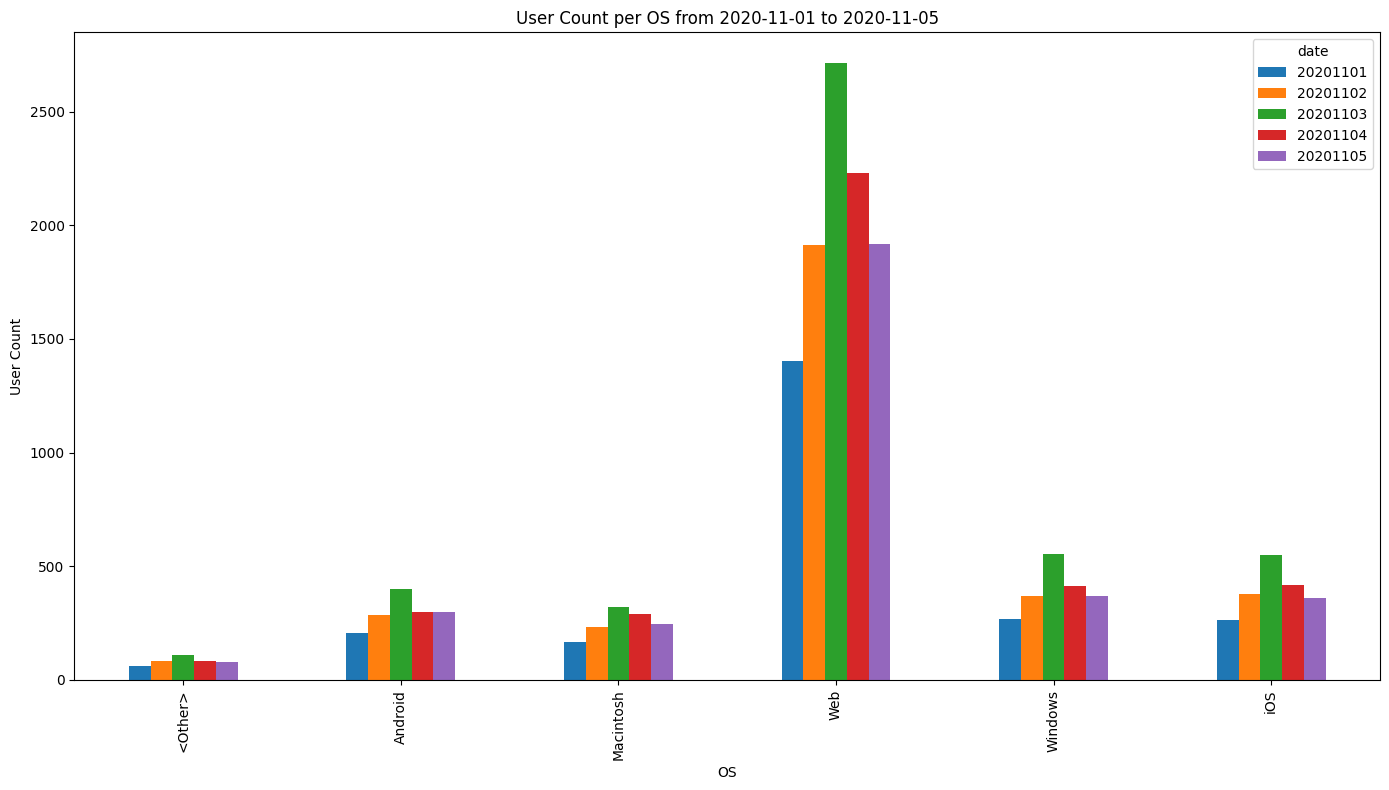

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
from google.oauth2 import service_account

sql = """
SELECT
  _TABLE_SUFFIX AS date,
  OS,
  COUNT(DISTINCT user_pseudo_id) AS user_count
FROM
  `data-analytic-project-405114.G4_daily_user.G4_daily_user_*`
WHERE
  _TABLE_SUFFIX BETWEEN '20201101' AND '20201105'
GROUP BY
  date,
  OS
"""
df_raw = pd.read_gbq(sql, 
project_id,credentials=credentials)
df_pivot = df_raw.pivot_table(index='OS', columns='date', values='user_count')

# Plotting
fig, ax = plt.subplots(figsize=(14, 8))
df_pivot.plot(kind='bar', ax=ax) 
ax.set_xlabel('OS')
ax.set_ylabel('User Count')
ax.set_title('User Count per OS from 2020-11-01 to 2020-11-05')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

